## PCA

1. 一个非监督学习的机器学习算法
2. 主要用于数据的降维
3. 通过降维可以发现便于人类理解的特征
4. 其他应用：可视化，去噪
5. 能从冗余特征中提取主要成分。

### 步骤

1. 对所有样本进行demean处理
2. 我们想要求一个轴的方向w = (w1,w2)
3. 使得我们的样本映射到w以后，var达到最大。
![](http://p9tybni1b.bkt.clouddn.com/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.png)
![](http://p9tybni1b.bkt.clouddn.com/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%902.png)

## 使用梯度上升法来求解主成分

In [2]:
import numpy as np
import matplotlib.pyplot as plt

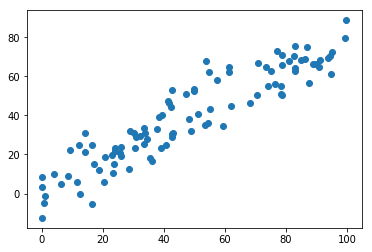

In [3]:
x = np.zeros([100,2])
x[:,0] = np.random.uniform(0,100,size=100)
x[:,1] = 0.75*x[:,0]+3+np.random.normal(0,10,size=100)
plt.scatter(x[:,0],x[:,1])
plt.show()

### demean

In [3]:
def demean(x):
    return x-np.mean(x,axis=0)

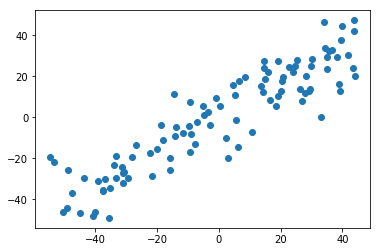

In [4]:
x = demean(x)
plt.scatter(x[:,0],x[:,1])
plt.show()

### 梯度上升法

In [5]:
def f(w,x):
    return np.sum((x.dot(w)**2))/len(x)


def df_math(w,x):
    return x.T.dot(x.dot(w))*2/len(x)


def df_debug(w,x,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(x)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = ((f(w_1,x)-f(w_2,x))/(2*epsilon))
    return res


def gradient_ascent()

In [ ]:
class PCA:
    def __init__(self,k):
        """初始化PCA"""
        assert k>=1,"input k must be more than 1"
        self.k = k
        self.k_ = None
        
    def fit(self,x,eta=0.01,n_iter=1e4):
        """获得数据的前n个主成分"""
        assert self.k <= x.shape[1],"k must be less zhan the  number of feature"

## scikit-learn中的PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=1)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
w = pca.components_
w # 求出的w和梯度上升的解相反，因为封装的是数学的方法

array([[0.77761131, 0.6287453 ]])

In [25]:
x.dot(w.T).shape

(100, 1)

In [29]:
x_ = pca.transform(x)
x__ = pca.inverse_transform(x_)

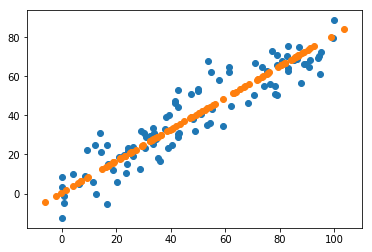

In [30]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(x__[:,0],x__[:,1])
plt.show()

### 实例

In [31]:
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

In [32]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [34]:
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

trainX,testX,trainY,testY = train_test_split(x,y)
knn1 = KNeighborsClassifier()
knn1.fit(trainX,trainY)
s1 = knn1.score(testX,testY)

pca = PCA(n_components=2)
pca.fit(trainX)
train_X = pca.transform(trainX)
test_X = pca.transform(testX)
knn2 = KNeighborsClassifier()
knn2.fit(train_X,trainY)
s2 = knn2.score(test_X,testY)

print("准确度未降维%s"%s1,"\n","\r准确度已降维%s"%s2)

准确度未降维0.9733333333333334 
准确度已降维0.66


### 如何选择降维后的维数

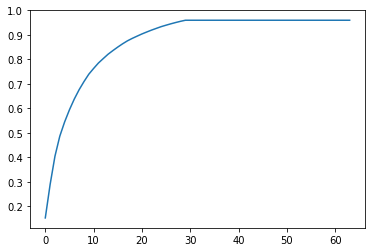

In [51]:
pca.explained_variance_ratio_
plt.plot([i for i in range(x.shape[1])],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x.shape[1])])
plt.show()

In [57]:
pca = PCA(0.95)
pca.fit(trainX)
train_X = pca.transform(trainX) 
test_X = pca.transform(testX)
knn3 = KNeighborsClassifier()
knn3.fit(train_X,trainY)
s3 = knn3.score(test_X,testY)
print("准确度%s"%s3)

准确度0.9733333333333334


### MNIST

In [66]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [67]:
mnist = fetch_mldata("MNIST original")
x = mnist['data']
y = mnist['target']

TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。

#### 因为各项特征所在同一量纲下，所以不需要数据归一化

In [ ]:
trainX,testX,trainY,testY = train_test_split(x,y)
pca = PCA(0.9)
pca.fit(trainX)
train_X = pca.transform(trainX)
test_X = pca.transform(testX)

knn1 = KNeighborsClassifier()
knn1.fit(trainX,trainY)
print(knn1.score(testX,testY))

knn2 = KNeighborsClassifier()
knn2.fit(train_X,trainY)
print(knn2.score(test_X,testY))